In [1]:
import matplotlib.pyplot as plot
import numpy as np
import cv2
%matplotlib inline

# 仿射变换（ Afine Transformations ）

图像上的仿射变换, 其实就是图片中的一个像素点，通过某种变换，移动到另外一个地方。

从数学上来讲， 就是一个向量空间进行一次线形变换并加上平移向量， 从而变换到另外一个向量空间的过程。

## 平行移动

原图像记为$(x,y)$，变换后的图像记为$(x',y')$。

图像放大缩小矩阵为下式：
$$
\left(
\begin{matrix}
x'\\
y'
\end{matrix}
\right)=
\left(
\begin{matrix}
a&b\\
c&d
\end{matrix}
\right)\ 
\left(
\begin{matrix}
x\\
y
\end{matrix}
\right)
$$
另一方面，平行移动按照下面的式子计算：
$$
\left(
\begin{matrix}
x'\\
y'
\end{matrix}
\right)=
\left(
\begin{matrix}
x\\
y
\end{matrix}
\right)+
\left(
\begin{matrix}
t_x\\
t_y
\end{matrix}
\right)
$$
把上面两个式子盘成一个：
$$
\left(
\begin{matrix}
x'\\
y'\\
1
\end{matrix}
\right)=
\left(
\begin{matrix}
a&b&t_x\\
c&d&t_y\\
0&0&1
\end{matrix}
\right)\ 
\left(
\begin{matrix}
x\\
y\\
1
\end{matrix}
\right)
$$
但是在实际操作的过程中，如果一个一个地计算原图像的像素的话，处理后的像素可能没有在原图像中有对应的坐标。[^2]

[^2]: 这句话原文是“処理後の画像で値が割り当てられない可能性がでてきてしまう。”直译大概是”处理后的图像可能没有被分配到值。“我也不知道该怎么翻译才好……你们看输出图像左下角黑色的那一块，就是这种没有被”分配“到的情况。

因此，我们有必要对处理后的图像中各个像素进行仿射变换逆变换，取得变换后图像中的像素在原图像中的坐标。仿射变换的逆变换如下：
$$
\left(
\begin{matrix}
x\\
y
\end{matrix}
\right)=
\frac{1}{a\  d-b\  c}\ 
\left(
\begin{matrix}
d&-b\\
-c&a
\end{matrix}
\right)\  
\left(
\begin{matrix}
x'\\
y'
\end{matrix}
\right)-
\left(
\begin{matrix}
t_x\\
t_y
\end{matrix}
\right)
$$
这回的平行移动操作使用下面的式子计算。$t_x$和$t_y$是像素移动的距离。
$$
\left(
\begin{matrix}
x'\\
y'\\
1
\end{matrix}
\right)=
\left(
\begin{matrix}
1&0&t_x\\
0&1&t_y\\
0&0&1
\end{matrix}
\right)\  
\left(
\begin{matrix}
x\\
y\\
1
\end{matrix}
\right)
$$

### 练习: 利用仿射变换让图像在$x$方向上$+30$，在$y$方向上$-30$

In [10]:
# Affine
def affine(org_img, a, b, c, d, tx, ty):
    H, W, C = org_img.shape

    # temporary image
    img = np.zeros((H + 2, W + 2, C), dtype=np.float32)
    img[1:H + 1, 1:W + 1] = org_img

    # get new image shape
    H_new = np.round(H * d).astype(np.int)
    W_new = np.round(W * a).astype(np.int)
    out = np.zeros((H_new + 1, W_new + 1, C), dtype=np.float32)

    # get position of new image
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

    # get position of original image by affine
    adbc = a * d - b * c
    x = np.round((d * x_new - b * y_new) / adbc).astype(np.int) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

    x = np.minimum(np.maximum(x, 0), W + 1).astype(np.int)
    y = np.minimum(np.maximum(y, 0), H + 1).astype(np.int)

    # assgin pixcel to new image
    out[y_new, x_new] = img[y, x]

    out = out[:H_new, :W_new]
    out = out.astype(np.uint8)

    return out

In [11]:
_img = cv2.imread("./img/imori.jpg").astype(np.float32)

# Affine
out = affine(_img, a=1, b=0, c=0, d=1, tx=30, ty=-30)

cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 使用 opencv 解决

平移空间变换表达式

<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-1" style="width: 17.872em; display: inline-block;"><span style="display: inline-block; position: relative; width: 13.619em; height: 0px; font-size: 131%;"><span style="position: absolute; clip: rect(1.844em, 1013.37em, 4.509em, -1000em); top: -3.426em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="texatom" id="MathJax-Span-3"><span class="mrow" id="MathJax-Span-4"><span class="mrow" id="MathJax-Span-5"><span class="mo" id="MathJax-Span-6" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">[</span></span><span class="mtable" id="MathJax-Span-7"><span style="display: inline-block; position: relative; width: 0.841em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(2.449em, 1000.84em, 5.073em, -1000em); top: -3.99em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.841em; height: 0px;"><span style="position: absolute; clip: rect(3.101em, 1000.84em, 4.131em, -1000em); top: -4.643em; left: 50%; margin-left: -0.421em;"><span class="mtd" id="MathJax-Span-8"><span class="mrow" id="MathJax-Span-9"><span class="msup" id="MathJax-Span-10"><span style="display: inline-block; position: relative; width: 0.841em; height: 0px;"><span style="position: absolute; clip: rect(3.418em, 1000.52em, 4.131em, -1000em); top: -3.99em; left: 0em;"><span class="mi" id="MathJax-Span-11" style="font-family: MathJax_Math; font-style: italic;">x</span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; top: -4.353em; left: 0.572em;"><span class="mo" id="MathJax-Span-12" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; clip: rect(3.101em, 1000.82em, 4.325em, -1000em); top: -3.243em; left: 50%; margin-left: -0.409em;"><span class="mtd" id="MathJax-Span-13"><span class="mrow" id="MathJax-Span-14"><span class="msup" id="MathJax-Span-15"><span style="display: inline-block; position: relative; width: 0.817em; height: 0px;"><span style="position: absolute; clip: rect(3.418em, 1000.5em, 4.325em, -1000em); top: -3.99em; left: 0em;"><span class="mi" id="MathJax-Span-16" style="font-family: MathJax_Math; font-style: italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.006em;"></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; top: -4.353em; left: 0.548em;"><span class="mo" id="MathJax-Span-17" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span></span><span class="mo" id="MathJax-Span-18" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">]</span></span></span></span></span><span class="mo" id="MathJax-Span-19" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="texatom" id="MathJax-Span-20" style="padding-left: 0.278em;"><span class="mrow" id="MathJax-Span-21"><span class="mrow" id="MathJax-Span-22"><span class="mo" id="MathJax-Span-23" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">[</span></span><span class="mtable" id="MathJax-Span-24"><span style="display: inline-block; position: relative; width: 2em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(2.544em, 1000.46em, 4.892em, -1000em); top: -3.99em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.5em; height: 0px;"><span style="position: absolute; clip: rect(3.194em, 1000.43em, 4.12em, -1000em); top: -4.64em; left: 50%; margin-left: -0.25em;"><span class="mtd" id="MathJax-Span-25"><span class="mrow" id="MathJax-Span-26"><span class="mn" id="MathJax-Span-27" style="font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; clip: rect(3.194em, 1000.46em, 4.142em, -1000em); top: -3.24em; left: 50%; margin-left: -0.25em;"><span class="mtd" id="MathJax-Span-31"><span class="mrow" id="MathJax-Span-32"><span class="mn" id="MathJax-Span-33" style="font-family: MathJax_Main;">0</span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; clip: rect(2.544em, 1000.46em, 4.87em, -1000em); top: -3.99em; left: 1.5em;"><span style="display: inline-block; position: relative; width: 0.5em; height: 0px;"><span style="position: absolute; clip: rect(3.194em, 1000.46em, 4.142em, -1000em); top: -4.64em; left: 50%; margin-left: -0.25em;"><span class="mtd" id="MathJax-Span-28"><span class="mrow" id="MathJax-Span-29"><span class="mn" id="MathJax-Span-30" style="font-family: MathJax_Main;">0</span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; clip: rect(3.194em, 1000.43em, 4.12em, -1000em); top: -3.24em; left: 50%; margin-left: -0.25em;"><span class="mtd" id="MathJax-Span-34"><span class="mrow" id="MathJax-Span-35"><span class="mn" id="MathJax-Span-36" style="font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span></span><span class="mo" id="MathJax-Span-37" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">]</span></span></span></span></span><span class="mo" id="MathJax-Span-38" style="font-family: MathJax_Main; padding-left: 0.222em;">×</span><span class="texatom" id="MathJax-Span-39" style="padding-left: 0.222em;"><span class="mrow" id="MathJax-Span-40"><span class="mrow" id="MathJax-Span-41"><span class="mo" id="MathJax-Span-42" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">[</span></span><span class="mtable" id="MathJax-Span-43"><span style="display: inline-block; position: relative; width: 0.572em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(2.766em, 1000.52em, 5.073em, -1000em); top: -3.99em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.572em; height: 0px;"><span style="position: absolute; clip: rect(3.418em, 1000.52em, 4.131em, -1000em); top: -4.643em; left: 50%; margin-left: -0.286em;"><span class="mtd" id="MathJax-Span-44"><span class="mrow" id="MathJax-Span-45"><span class="mi" id="MathJax-Span-46" style="font-family: MathJax_Math; font-style: italic;">x</span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; clip: rect(3.418em, 1000.5em, 4.325em, -1000em); top: -3.243em; left: 50%; margin-left: -0.248em;"><span class="mtd" id="MathJax-Span-47"><span class="mrow" id="MathJax-Span-48"><span class="mi" id="MathJax-Span-49" style="font-family: MathJax_Math; font-style: italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.006em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span></span><span class="mo" id="MathJax-Span-50" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">]</span></span></span></span></span><span class="mo" id="MathJax-Span-51" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="texatom" id="MathJax-Span-52" style="padding-left: 0.222em;"><span class="mrow" id="MathJax-Span-53"><span class="mrow" id="MathJax-Span-54"><span class="mo" id="MathJax-Span-55" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">[</span></span><span class="mtable" id="MathJax-Span-56"><span style="display: inline-block; position: relative; width: 0.858em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(2.516em, 1000.86em, 5.02em, -1000em); top: -3.99em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.858em; height: 0px;"><span style="position: absolute; clip: rect(3.166em, 1000.86em, 4.286em, -1000em); top: -4.64em; left: 50%; margin-left: -0.429em;"><span class="mtd" id="MathJax-Span-57"><span class="mrow" id="MathJax-Span-58"><span class="msubsup" id="MathJax-Span-59"><span style="display: inline-block; position: relative; width: 0.858em; height: 0px;"><span style="position: absolute; clip: rect(3.166em, 1000.42em, 4.131em, -1000em); top: -3.99em; left: 0em;"><span class="mi" id="MathJax-Span-60" style="font-family: MathJax_Math; font-style: italic;">b</span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; top: -3.84em; left: 0.429em;"><span class="mn" id="MathJax-Span-61" style="font-size: 70.7%; font-family: MathJax_Main;">0</span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; clip: rect(3.166em, 1000.86em, 4.27em, -1000em); top: -3.24em; left: 50%; margin-left: -0.429em;"><span class="mtd" id="MathJax-Span-62"><span class="mrow" id="MathJax-Span-63"><span class="msubsup" id="MathJax-Span-64"><span style="display: inline-block; position: relative; width: 0.858em; height: 0px;"><span style="position: absolute; clip: rect(3.166em, 1000.42em, 4.131em, -1000em); top: -3.99em; left: 0em;"><span class="mi" id="MathJax-Span-65" style="font-family: MathJax_Math; font-style: italic;">b</span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span><span style="position: absolute; top: -3.84em; left: 0.429em;"><span class="mn" id="MathJax-Span-66" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.99em;"></span></span></span></span><span class="mo" id="MathJax-Span-67" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">]</span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.426em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.305em; border-left: 0px solid; width: 0px; height: 3.264em;"></span></span></nobr></span></div>

In [ ]:
img = cv2.imread("./img/imori.jpg")
height,width,channel = img.shape

# 声明变换矩阵 向右平移30个像素， 向上平移30个像素
M = np.float32([[1, 0, 30], [0, 1, -30]])
# 进行2D 仿射变换
shifted = cv2.warpAffine(img, M, (width, height))
cv2.imshow("result", shifted)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 放大缩小

### 练习:  使用仿射变换，将图片在$x$方向上放大$1.3$倍，在$y$方向上缩小至原来的$\frac{4}{5}$

In [13]:
_img = cv2.imread("./img/imori.jpg").astype(np.float32)

# Affine
out = affine(_img, a=1.3, b=0, c=0, d=0.8, tx=0, ty=-0)

# Save result
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 使用 opencv 解决

opencv 其实有专门进行图像缩放的函数 resize。
```
   resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
```
参数解析

*    src 输入图片
*    dsize 输出图片的尺寸
*    dst 输出图片
*    fx x轴的缩放因子
*    fy y轴的缩放因子
*    interpolation 插值方式
*    INTER_NEAREST - 最近邻插值
*    INTER_LINEAR - 线性插值（默认）
*    INTER_AREA - 区域插值
*    INTER_CUBIC - 三次样条插值
*    INTER_LANCZOS4 - Lanczos插值

#### 传入指定的图片的尺寸dsize

In [17]:
img = cv2.imread('./img/imori.jpg')
height,width,channel = img.shape

# 声明新的维度
new_dimension = (400, 400)
resized = cv2.resize(img, new_dimension)
cv2.imshow("result", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 指定缩放因子 fx, fy

In [19]:
resized = cv2.resize(img, None, fx=1.3, fy=0.8)
cv2.imshow("result", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

####  分辨率 从5*5 放大到1000*1000, 选择不同的插值算法，对应的演示效果。

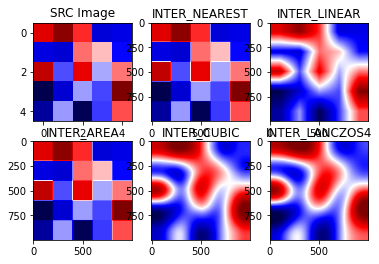

In [22]:
"""
差值算法对比
"""
img = np.uint8(np.random.randint(0,255,size=(5,5)))
height,width= img.shape

# 声明新的维度
new_dimension = (1000, 1000)

plt.subplot(231)
plt.title("SRC Image")
plt.imshow(img,cmap='seismic')

plt.subplot(232)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_NEAREST)
plt.title("INTER_NEAREST")
plt.imshow(resized,cmap='seismic')

plt.subplot(233)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_LINEAR)
plt.title("INTER_LINEAR")
plt.imshow(resized,cmap='seismic')

plt.subplot(234)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_AREA)
plt.title("INTER_AREA")
plt.imshow(resized,cmap='seismic')

plt.subplot(235)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_CUBIC)
plt.title("INTER_CUBIC")
plt.imshow(resized,cmap='seismic')

plt.subplot(236)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_LANCZOS4)
plt.title("INTER_LANCZOS4")
plt.imshow(resized,cmap='seismic')

plt.show()

## 旋转

使用下面的式子进行逆时针方向旋转$A$度的仿射变换：
$$
\left(
\begin{matrix}
x'\\
y'\\
1
\end{matrix}
\right)=
\left(
\begin{matrix}
\cos(A)&-\sin(A)&t_x\\
\sin(A)&\cos(A)&t_y\\
0&0&1
\end{matrix}
\right)\ 
\left(
\begin{matrix}
x\\
y\\
1
\end{matrix}
\right)
$$


### 练习:  使用仿射变换，逆时针旋转$30$度

In [2]:
# affine
def affine(org_img, a, b, c, d, tx, ty):
    H, W, C = org_img.shape

    # temporary image
    img = np.zeros((H + 2, W + 2, C), dtype=np.float32)
    img[1:H + 1, 1:W + 1] = org_img

    # get shape of new image
    H_new = np.round(H).astype(np.int)
    W_new = np.round(W).astype(np.int)
    out = np.zeros((H_new, W_new, C), dtype=np.float32)

    # get position of new image
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

    # get position of original image by affine
    adbc = a * d - b * c
    x = np.round((d * x_new - b * y_new) / adbc).astype(np.int) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

    # adjust center by affine
    dcx = (x.max() + x.min()) // 2 - W // 2
    dcy = (y.max() + y.min()) // 2 - H // 2

    x -= dcx
    y -= dcy

    x = np.clip(x, 0, W + 1)
    y = np.clip(y, 0, H + 1)

    # assign pixcel
    out[y_new, x_new] = img[y, x]
    out = out.astype(np.uint8)

    return out

In [9]:
_img = cv2.imread("./img/imori.jpg").astype(np.float32)

# Affine
A = 30.
theta = - np.pi * A / 180.

out = affine(_img, a=np.cos(theta), b=-np.sin(theta), c=np.sin(theta), d=np.cos(theta),
             tx=0, ty=0)

cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 使用 opencv 解决

使用getRotationMatrix2D (内置API)与wrapAffine (矩阵运算)两种方式完成图像的旋转.

#### 利用getRotationMatrix2D实现旋转

opencv 中 `getRotationMatrix2D` 函数可以直接帮我们生成 `M` 而不需要我们在程序里计算三角函数．
参数解析

*    center 旋转中心点 (cx, cy) 你可以随意指定

*    angle 旋转的角度 单位是角度 逆时针方向为正方向 ， 角度为正值代表逆时针。

*    scale 缩放倍数. 值等于1.0代表尺寸不变

In [5]:
def rotate(image, angle, center = None, scale = 1.0):

    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

In [8]:
_img = cv2.imread("./img/imori.jpg")

# Affine
rotated=rotate(_img, 30)
cv2.imshow("result", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 利用wrapAffine实现缩放

围绕原点进行旋转
![20170323174605746.png](./img/20170323174605746.png)
\begin{align*} x &= r * cos(\phi)\\ \\ x' &= r * cos(\phi + \theta)\\ &= r*cos(\phi)*cos(\theta) - r*sin(\phi)*sin(\theta)\\ \\ y &= r * sin(\phi)\\ \\ y' &= r * sin(\phi + \theta)\\ &= r*sin(\phi)*cos(\theta) + r*cos(\phi)*sin(\theta) \end{align*}
由此我们得出

所以对应的变换矩阵为

\begin{equation} { \left[ \begin{array}{c} x'\\ y'\\ \end{array} \right ]}= { \left[ \begin{array}{cc} cos(\theta) & -sin(\theta)\\ sin(\theta) & cos(\theta)\\ \end{array} \right ]}\times { \left[\begin{array}{c} x\\ y\\ \end{array} \right] }+ { \left[\begin{array}{c} 0\\ 0\\ \end{array} \right] } \end{equation}

**注意，这里我们进行公式推导的时候，参照的原点是在左下角， 而在OpenCV中图像的原点在图像的左上角， 所以我们在代码里面对theta取反。**

我们可以利用`math`包中的三角函数。但是有一点需要注意 ：**三角函数输入的角度是弧度制而不是角度制**。

我们需要使用`radians(x)` 函数， 将角度转变为弧度。

```
import math
math.radians(180)

```

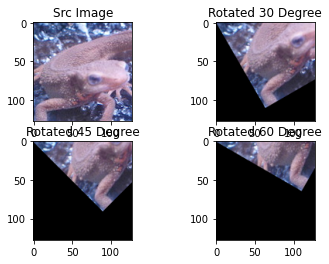

In [11]:
# -*- coding: utf-8 -*-
'''
围绕原点处旋转　(图片左上角)　正方向为逆时针
'''
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

img = cv2.imread('./img/imori.jpg')

height, width, channel = img.shape

def getRotationMatrix2D(theta):
    # 角度值转换为弧度值
    # 因为图像的左上角是原点 需要×-1
    theta = math.radians(-1*theta)

    M = np.float32([
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0]])
    return M

# 进行2D 仿射变换
# 围绕原点 顺时针旋转30度
M = getRotationMatrix2D(30)
rotated_30 = cv2.warpAffine(img, M, (width, height))

# 围绕原点 顺时针旋转45度
M = getRotationMatrix2D(45)
rotated_45 = cv2.warpAffine(img, M, (width, height))

# 围绕原点 顺时针旋转60度
M = getRotationMatrix2D(60)
rotated_60 = cv2.warpAffine(img, M, (width, height))

plt.subplot(221)
plt.title("Src Image")
plt.imshow(img[:,:,::-1])

plt.subplot(222)
plt.title("Rotated 30 Degree")
plt.imshow(rotated_30[:,:,::-1])

plt.subplot(223)
plt.title("Rotated 45 Degree")
plt.imshow(rotated_45[:,:,::-1])

plt.subplot(224)
plt.title("Rotated 60 Degree")
plt.imshow(rotated_60[:,:,::-1])

plt.show()

##### 围绕任意点进行旋转

那么如何围绕任意点进行旋转呢？

可以先把当前的旋转中心点平移到原点处， 在原点处旋转后再平移回去。

假定旋转中心为 (c_x, c_y)

M_{translation} 为平移矩阵 M_{translation}^{-1} 为平移矩阵的逆矩阵 M_{rotation} 为原点旋转矩阵

其中

所以

\begin{align*} M &= M_{translation}^{-1} \times M_{rotation} \times M_{translation}\\ &= { \left[ \begin{array}{c} 1 &0 & c_x\\ 0& 1& c_y\\ 0 & 0 & 1\\ \end{array} \right ] } \times { \left[ \begin{array}{c} cos(\theta) &-sin(\theta) & 0\\ sin(\theta) & cos(\theta)& 0\\ 0 & 0 & 1\\ \end{array} \right ] } \times { \left[ \begin{array}{c} 1 &0 &-c_x\\ 0& 1& -c_y\\ 0 & 0 & 1\\ \end{array} \right ] }\\ &= { \left[ \begin{array}{c} cos(\theta) &-sin(\theta) & (1-cos(\theta))*c_{x} + sin(\theta)*c_{y}\\ sin(\theta) & cos(\theta)& -sin(\theta)*c_{x} + (1-cos(\theta))*c_{y}\\ 0 & 0 & 1\\ \end{array} \right ] } \end{align*}

完美．

**旋转效果**

围绕图片中心点旋转30度至60度。

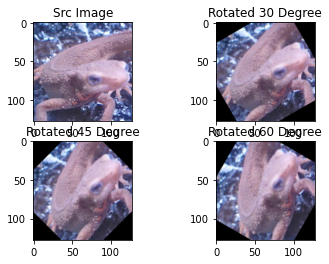

In [13]:
# -*- coding: utf-8 -*- 
'''
围绕画面中的任意一点旋转
'''
import numpy as np
import cv2
from math import cos,sin,radians
from matplotlib import pyplot as plt

img = cv2.imread('./img/imori.jpg')

height, width, channel = img.shape

theta = 45

def getRotationMatrix2D(theta, cx=0, cy=0):
    # 角度值转换为弧度值
    # 因为图像的左上角是原点 需要×-1
    theta = radians(-1 * theta)

    M = np.float32([
        [cos(theta), -sin(theta), (1-cos(theta))*cx + sin(theta)*cy],
        [sin(theta), cos(theta), -sin(theta)*cx + (1-cos(theta))*cy]])
    return M

# 求得图片中心点， 作为旋转的轴心
cx = int(width / 2)
cy = int(height / 2)

# 进行2D 仿射变换
# 围绕原点 逆时针旋转30度
M = getRotationMatrix2D(30, cx=cx, cy=cy)
rotated_30 = cv2.warpAffine(img, M, (width, height))

# 围绕原点 逆时针旋转45度
M = getRotationMatrix2D(45, cx=cx, cy=cy)
rotated_45 = cv2.warpAffine(img, M, (width, height))

# 围绕原点 逆时针旋转60度
M = getRotationMatrix2D(60, cx=cx, cy=cy)
rotated_60 = cv2.warpAffine(img, M, (width, height))

plt.subplot(221)
plt.title("Src Image")
plt.imshow(img[:,:,::-1])

plt.subplot(222)
plt.title("Rotated 30 Degree")
plt.imshow(rotated_30[:,:,::-1])

plt.subplot(223)
plt.title("Rotated 45 Degree")
plt.imshow(rotated_45[:,:,::-1])

plt.subplot(224)
plt.title("Rotated 60 Degree")
plt.imshow(rotated_60[:,:,::-1])

plt.show()

## 翻转

翻转图像是通过在水平轴或者垂直轴上对图像进行镜像反转而生成的静态或动态图像

### 利用 numpy 的索引实现翻转

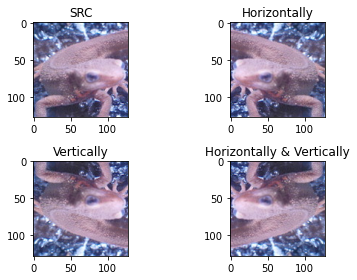

In [24]:
'''
使用numpy的索引进行图像反转
'''

img = cv2.imread('./img/imori.jpg')
height,width,channel = img.shape

# 水平翻转
flip_h =  img[:,::-1]

# 垂直翻转
flip_v =  img[::-1]

# 水平垂直同时翻转
flip_hv =  img[::-1, ::-1]

def bgr2rbg(img):
    '''
        将颜色空间从BGR转换为RBG
    '''
    return img[:,:,::-1]

plt.subplot(2,2,1)
plt.title('SRC')
plt.imshow(bgr2rbg(img))

plt.subplot(2,2,2)
plt.title('Horizontally')
plt.imshow(bgr2rbg(flip_h))

plt.subplot(2,2,3)
plt.title('Vertically')
plt.imshow(bgr2rbg(flip_v))

plt.subplot(2,2,4)
plt.title('Horizontally & Vertically')
plt.imshow(bgr2rbg(flip_hv))
plt.tight_layout() 
plt.show()

### 使用 opencv 的 flip 函数实现翻转

**flip 函数原型**

flip(src, flipCode[, dst]) -> dst

**参数解析**

- 

    `src` 输入图片

- 

    `flipCode` 翻转代码

- 

    `1` 水平翻转 **Horizontally** （图片第二维度是column）

- 

    `0` 垂直翻转 **Vertically ** （图片第一维是row）

- 
    `-1` 同时水平翻转与垂直反转 **Horizontally & Vertically**

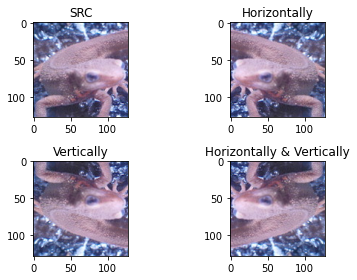

In [25]:
img = cv2.imread('./img/imori.jpg')

def bgr2rbg(img):
    '''
        将颜色空间从BGR转换为RBG
    '''
    return img[:,:,::-1]

# 水平翻转
flip_h = cv2.flip(img, 1)
# 垂直翻转
flip_v = cv2.flip(img, 0)
# 同时水平翻转与垂直翻转
flip_hv = cv2.flip(img, -1)

plt.subplot(221)
plt.title('SRC')
plt.imshow(bgr2rbg(img))

plt.subplot(222)
plt.title('Horizontally')
plt.imshow(bgr2rbg(flip_h))

plt.subplot(223)
plt.title('Vertically')
plt.imshow(bgr2rbg(flip_v))

plt.subplot(224)
plt.title('Horizontally & Vertically')
plt.imshow(bgr2rbg(flip_hv))
plt.tight_layout() 
plt.show()

### 利用 wrapAffine 实现翻转

**水平翻转的变换矩阵**
\begin{equation}
{
\left[ \begin{array}{c}
x'\\
y'\\
\end{array} 
\right ]}=
{
\left[ \begin{array}{cc}
-1 & 0\\
0 & 1\\
\end{array}
\right ]}\times
{
  \left[\begin{array}{c}
  x\\
  y\\
  \end{array}
  \right]
}+
{
   \left[\begin{array}{c}
  width\\
  0 \\
  \end{array}
  \right]
}
\end{equation}

**垂直翻转的变换矩阵**

\begin{equation}
{
\left[ \begin{array}{c}
x'\\
y'\\
\end{array} 
\right ]}=
{
\left[ \begin{array}{cc}
1 & 0\\
0 & -1\\
\end{array}
\right ]}\times
{
  \left[\begin{array}{c}
  x\\
  y\\
  \end{array}
  \right]
}+
{
   \left[\begin{array}{c}
  0\\
  height \\
  \end{array}
  \right]
}
\end{equation}



**同时进行水平翻转与垂直翻转**

\begin{equation}
{
\left[ \begin{array}{c}
x'\\
y'\\
\end{array} 
\right ]}=
{
\left[ \begin{array}{cc}
-1 & 0\\
0 & -1\\
\end{array}
\right ]}\times
{
  \left[\begin{array}{c}
  x\\
  y\\
  \end{array}
  \right]
}+
{
   \left[\begin{array}{c}
  width\\
  height \\
  \end{array}
  \right]
}
\end{equation}

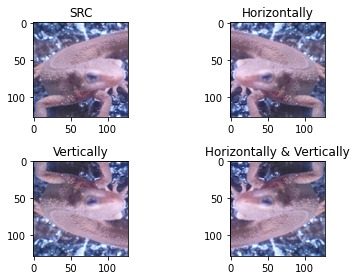

In [26]:
'''
使用仿射矩阵实现反转
'''
img = cv2.imread('./img/imori.jpg')
height,width,channel = img.shape

# 水平翻转
M1 = np.float32([[-1, 0, width], [0, 1, 0]])
flip_h =  cv2.warpAffine(img, M1, (width, height))

# 垂直翻转
M2 = np.float32([[1, 0, 0], [0, -1, height]])
flip_v =  cv2.warpAffine(img, M2, (width, height))

# 水平垂直同时翻转
M3 = np.float32([[-1, 0, width], [0, -1, height]])
flip_hv =  cv2.warpAffine(img, M3, (width, height))

def bgr2rbg(img):
    '''
        将颜色空间从BGR转换为RBG
    '''
    return img[:,:,::-1]

plt.subplot(221)
plt.title('SRC')
plt.imshow(bgr2rbg(img))

plt.subplot(222)
plt.title('Horizontally')
plt.imshow(bgr2rbg(flip_h))

plt.subplot(223)
plt.title('Vertically')
plt.imshow(bgr2rbg(flip_v))

plt.subplot(224)
plt.title('Horizontally & Vertically')
plt.imshow(bgr2rbg(flip_hv))
plt.tight_layout() 
plt.show()

## 倾斜

1. 使用仿射变换，输出（1）那样的$x$轴倾斜$30$度的图像（$t_x=30$），这种变换被称为X-sharing。
2. 使用仿射变换，输出（2）那样的y轴倾斜$30$度的图像（$t_y=30$），这种变换被称为Y-sharing。
3. 使用仿射变换，输出（3）那样的$x$轴、$y$轴都倾斜$30$度的图像($t_x = 30$，$t_y = 30$)。

原图像的大小为$h\  w$，使用下面各式进行仿射变换：

* X-sharing
  $$
  a=\frac{t_x}{h}\\
  \left[
  \begin{matrix}
  x'\\
  y'\\
  1
  \end{matrix}
  \right]=\left[
  \begin{matrix}
  1&a&t_x\\
  0&1&t_y\\
  0&0&1
  \end{matrix}
  \right]\ 
  \left[
  \begin{matrix}
  x\\
  y\\
  1
  \end{matrix}
  \right]
  $$

* Y-sharing
  $$
  a=\frac{t_y}{w}\\
  \left[
  \begin{matrix}
  x'\\
  y'\\
  1
  \end{matrix}
  \right]=\left[
  \begin{matrix}
  1&0&t_x\\
  a&1&t_y\\
  0&0&1
  \end{matrix}
  \right]\ 
  \left[
  \begin{matrix}
  x\\
  y\\
  1
  \end{matrix}
  \right]
  $$

| 输入 (imori.jpg) | 输出 (1) (answers_image/answer_31_1.jpg) | 输出 (2) (answers_image/answer_31_2.jpg) | 输出 (3) (answers_image/answer_31_3.jpg) |
| :--------------: | :--------------------------------------: | :--------------------------------------: | :--------------------------------------: |
|  ![](./img/imori.jpg)  |    ![](./img/answer_31_1.jpg)    |    ![](./img/answer_31_2.jpg)    |    ![](./img/answer_31_3.jpg)    |


In [16]:
def affine(org_img, dx=30, dy=30):
    # get shape
    H, W, C = org_img.shape

    # Affine hyper parameters
    a = 1.
    b = dx / H
    c = dy / W
    d = 1.
    tx = 0.
    ty = 0.

    # prepare temporary
    _img = np.zeros((H + 2, W + 2, C), dtype=np.float32)

    # insert image to center of temporary
    _img[1:H + 1, 1:W + 1] = org_img

    # prepare affine image temporary
    H_new = np.ceil(dy + H).astype(np.int)
    W_new = np.ceil(dx + W).astype(np.int)
    out = np.zeros((H_new, W_new, C), dtype=np.float32)

    # preprare assigned index
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

    # prepare inverse matrix for affine
    adbc = a * d - b * c
    x = np.round((d * x_new - b * y_new) / adbc).astype(np.int) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

    x = np.minimum(np.maximum(x, 0), W + 1).astype(np.int)
    y = np.minimum(np.maximum(y, 0), H + 1).astype(np.int)

    # assign value from original to affine image
    out[y_new, x_new] = _img[y, x]
    out = out.astype(np.uint8)

    return out

In [17]:
# Read image
img = cv2.imread("./img/imori.jpg").astype(np.float32)

# Affine
out = affine(img, dx=30, dy=30)

cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()